In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Brier score and log loss

Two of the most common loss functions for classification problems are Brier loss and log loss (here I'm defining Brier loss as the negative of Brier score. This will examine the use cases of each.

For now we will consider binary classifiers.

Suppose $y_i$ is the actual value for the $i$th data point, with a value of 1 or 0, and $p_i$ is the predicted probability that it is 1.

Brier loss is given by

$$ B = \sum_i (y_i - p_i)^2$$

Log loss is given by

$$L = -\sum_i y_i \ln p_i + (1 - y_i) \ln (1 - p_i) $$

Suppose you have a number of predictions, and you want build a model to maximize the number you get correct. If those errors are independent, then the total error is


Suppose you have a number of predictions, and you want build a model to maximize the number you get correct. We might look at the overall loss function as

$$ L = (\sum_i y_i - \sum_i p_i)^2$$

which expands to

$$
\begin{align}
B &= (\sum_i y_i - \sum_j p_j)^2 \\
 &= (\sum_{ij} y_i - p_j)^2
\end{align}
$$

If we can assume that $y_i$ is independent of $p_j$ for $i \ne j$, the 


$$(y_1 + y_2 + y_3 - p_1 - p_2 - p_3)^2$$

$$y_1^2 + y_2^2 + y_3^2 + p_1^2 + p_2^2 + p_3^2$$

$$(y_1 + y_2 - p_1 - p_2)^2$$

expanding

$$y_1^2 + y_2^2 + p_1^2 + p_2^2 + 2 y_1 y_2 + 2 p_1 p_2 - 2 y_1 p_1 - 2 y_2 p_2  - 2 y_1 p_2 - 2 y_2 p_1 $$

rearranging

$$y_1^2 - 2 y_1 p_1 + p_1^2 + y_2^2 - 2 y_2 p_2 + p_2^2 + 2 y_1 y_2 + 2 p_1 p_2 - 2 y_1 p_2 - 2 y_2 p_1 $$

simplifying

$$(y_1 - p_1)^2 + (y_2 - p_2)^2 + 2 (y_1 y_2 + p_1 p_2 - y_1 p_2 - y_2 p_1) $$


$$(y_1 - p_1)^2 + (y_2 - p_2)^2 + 2 (y_1 - p_1)(y_2 - p_2) $$

If the errors are independent, then this simplifies to the sum of Brier losses.

Suppose we have a cost of a false positive and a false negative. We are using our model to make a prediction and then acting accordingly. E.g., if a false positive costs 5 and a false negative costs 1, and our model predicts an 0.8 probability of the positive class, then we would say our expectation if we choose positive is $$-5 \cdot 0.2 = -1$$ and the expectation if we choose the negative class is $$-1 \cdot 0.8 = -0.8$$ so we choose the negative class.

So w

Let's assume there is a true underlying probability, and look as the underlying loss as a function of that probability.

In [23]:
def logloss(p, y):
    return -np.log(p) if y else -np.log(1-p)

def brierloss(p, y):
    return (y - p)**2

def expect(func, p, p_actual):
    return p_actual * func(p, 1) + (1-p_actual) * func(p, 0)


In [24]:
expect(logloss, 0.9, 0.9)

0.3250829733914482

<ipython-input-23-b6886d34d324>:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(p) if y else -np.log(1-p)


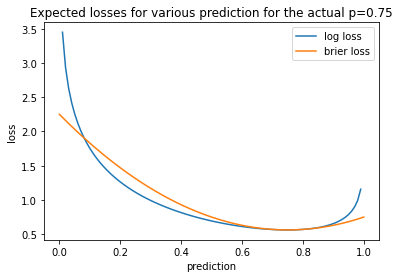

In [36]:
p_actual = 0.75
fig, ax = plt.subplots()
preds = np.linspace(0, 1, 100)
losses = np.array([expect(logloss, pred, p_actual) for pred in preds])
ax.plot(preds, losses, label='log loss')
losses = np.array([expect(brierloss, pred, p_actual) for pred in preds])
ax.plot(preds, 3*losses, label='brier loss')
ax.set_xlabel('prediction')
ax.set_ylabel('loss')
ax.set_title(f'Expected losses for various prediction for the actual p={p_actual}')
ax.legend()

Let's suppose that we are making individual the result of an outcome, so if you know that the 

Suppose we want to know, for a given probability, the p that minimizes log loss and brier loss.

https://fivethirtyeight.com/features/some-dos-and-donts-for-evaluating-senate-forecasts/

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
true_p = 0.3

This expectation values are

In [56]:
pred_p = np.linspace(0, 1, 10000)

In [57]:
log_loss = true_p * np.log2(pred_p) + (1-true_p) * np.log2(1-pred_p)

/Users/jackbennetto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [58]:
brier_loss = -(true_p * (1-pred_p)**2 + (1-true_p) * (0-pred_p)**2)

Text(0.5, 1.0, 'Brier loss')

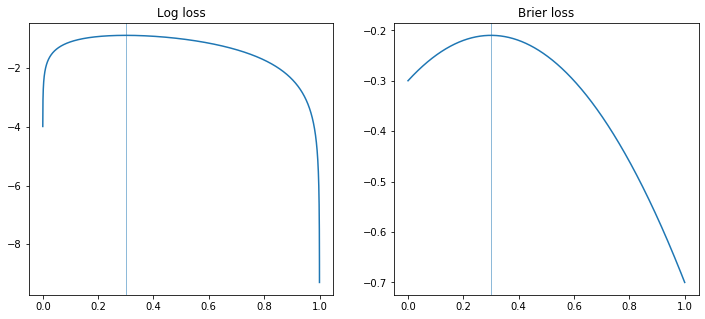

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax in axs:
#    ax.set_xlim(.2, .4)
    ax.axvline(.3, lw=0.5)

axs[0].plot(pred_p, log_loss)
#axs[0].set_ylim(-0.925, -0.88)
axs[0].set_title('Log loss')

axs[1].plot(pred_p, brier_loss)
#axs[1].set_ylim(-0.222, -0.21)
axs[1].set_title('Brier loss')


#ax.set_xlim(0.299, 0.301)
#ax.set_ylim(-0.8813, -0.88129)

So clearly they have the same peak, and you handle them the same way for something like knn.